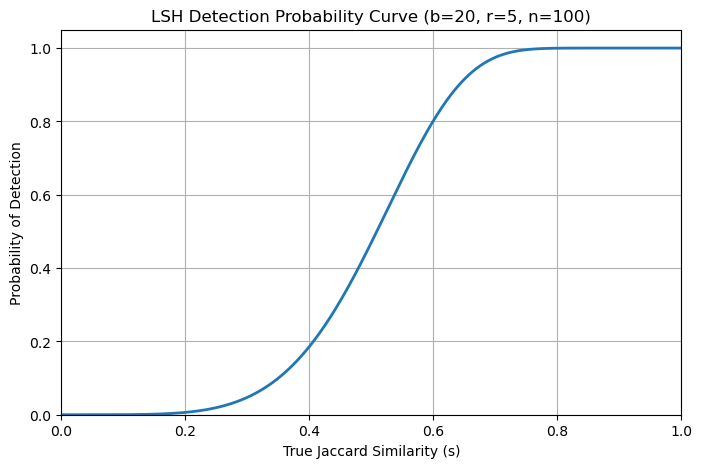

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# LSH detection probability formula
def P_detect(s, b, r):
    return 1 - (1 - s**r)**b

def plot_lsh_curve(b, r):
    similarities = np.linspace(0, 1, 500)
    probs = P_detect(similarities, b, r)

    plt.figure(figsize=(8,5))
    plt.plot(similarities, probs, linewidth=2)
    plt.title(f"LSH Detection Probability Curve (b={b}, r={r}, n={b*r})")
    plt.xlabel("True Jaccard Similarity (s)")
    plt.ylabel("Probability of Detection")
    plt.grid(True)
    plt.ylim(0, 1.05)
    plt.xlim(0, 1)
    plt.show()



plot_lsh_curve(b=20, r=5)   
# plot_lsh_curve(b=25, r=4) 
# plot_lsh_curve(b=10, r=10)
# plot_lsh_curve(b=50, r=2)
# plot_lsh_curve(b=5, r=20)


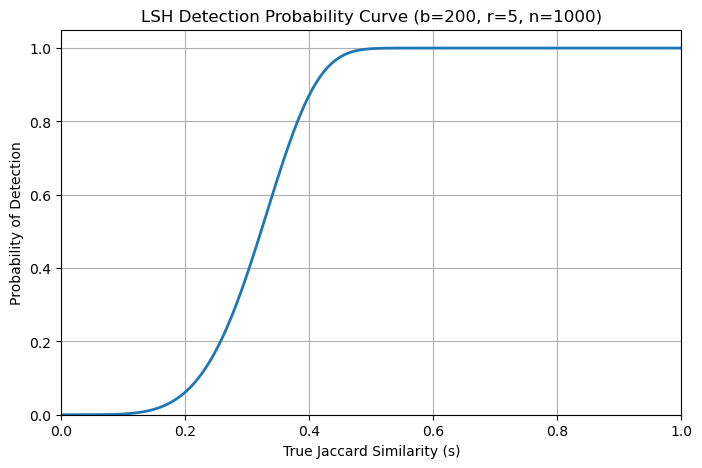

In [4]:
plot_lsh_curve(b=200, r=5)   

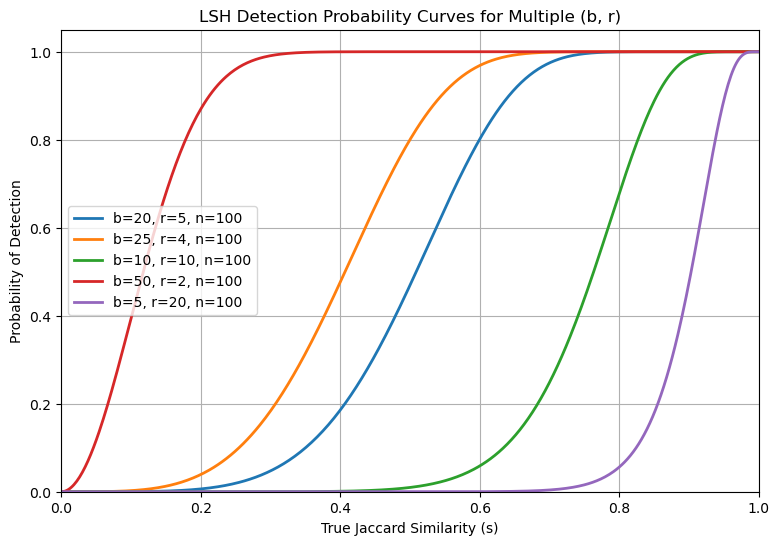

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# LSH detection probability formula
def P_detect(s, b, r):
    return 1 - (1 - s**r)**b

# list of (b, r) pairs you want to compare
configs = [
    (20, 5),
    (25, 4),
    (10, 10),
    (50, 2),
    (5, 20),
]

plt.figure(figsize=(9,6))
similarities = np.linspace(0, 1, 500)

for b, r in configs:
    probs = P_detect(similarities, b, r)
    plt.plot(similarities, probs, linewidth=2, label=f"b={b}, r={r}, n={b*r}")

plt.title("LSH Detection Probability Curves for Multiple (b, r)")
plt.xlabel("True Jaccard Similarity (s)")
plt.ylabel("Probability of Detection")
plt.grid(True)
plt.ylim(0, 1.05)
plt.xlim(0, 1)
plt.legend()
plt.show()


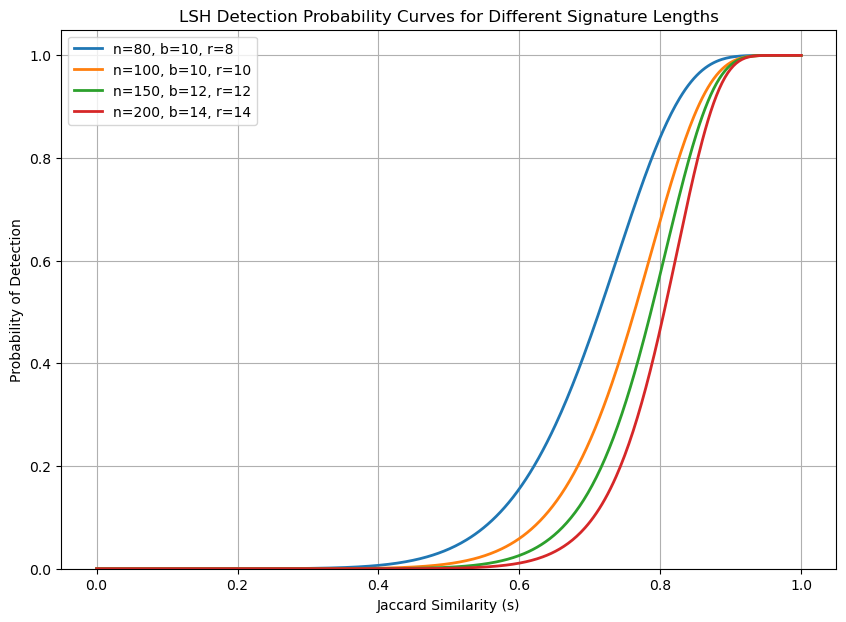

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def P_detect(s, b, r):
    return 1 - (1 - s**r)**b

# signature lengths you want to test
N_values = [80,100, 150, 200]

# generate similarity range
s = np.linspace(0, 1, 500)

plt.figure(figsize=(10,7))

for n in N_values:
    # choose ONE decomposition for each n (e.g., close to square)
    # many choices exist—this one tries r ~ sqrt(n)
    r = int(np.sqrt(n))
    b = n // r

    probs = P_detect(s, b, r)
    plt.plot(s, probs, linewidth=2, label=f"n={n}, b={b}, r={r}")

plt.title("LSH Detection Probability Curves for Different Signature Lengths")
plt.xlabel("Jaccard Similarity (s)")
plt.ylabel("Probability of Detection")
plt.grid(True)
plt.ylim(0,1.05)
plt.legend()
plt.show()


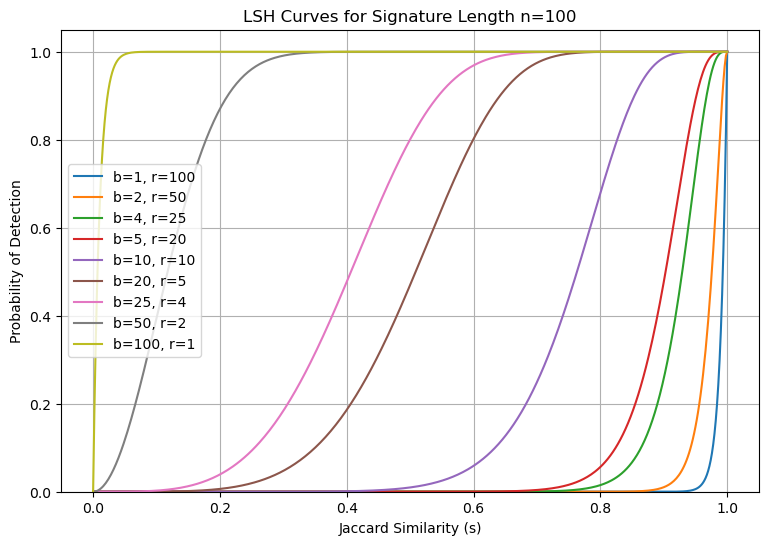

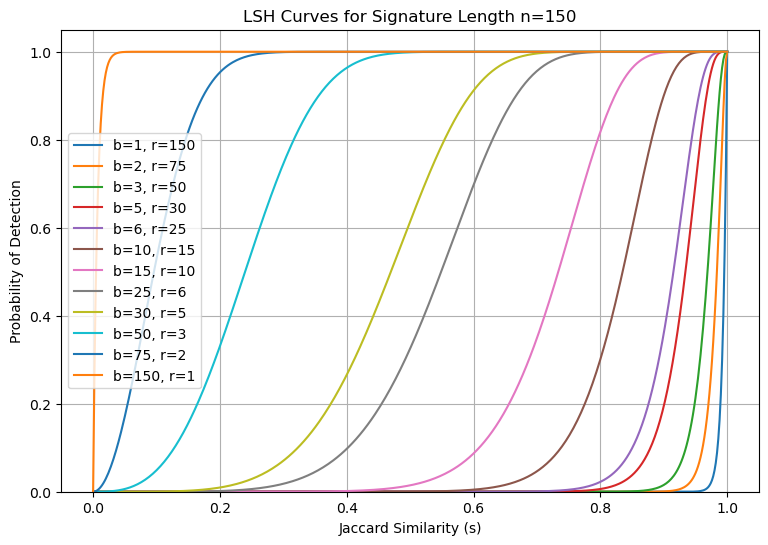

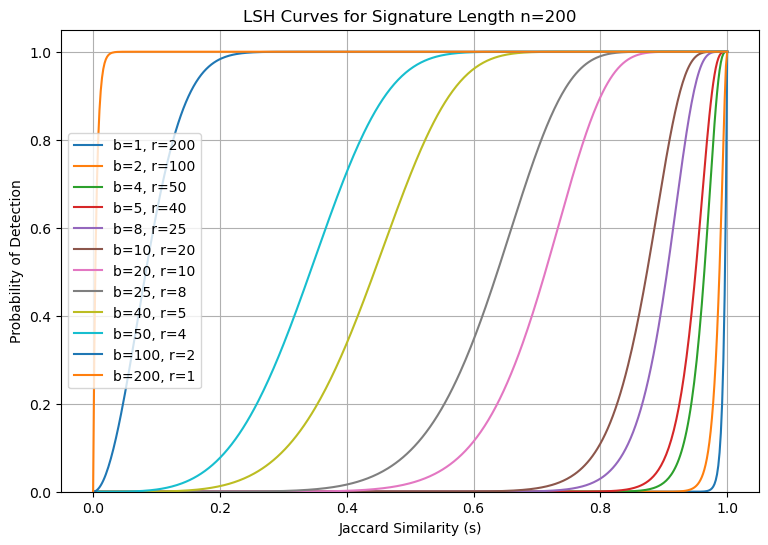

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def P_detect(s, b, r):
    return 1 - (1 - s**r)**b

# signature lengths
N_values = [100, 150, 200]
s = np.linspace(0, 1, 500)

for n in N_values:
    plt.figure(figsize=(9,6))
    plt.title(f"LSH Curves for Signature Length n={n}")
    
    # find all factor pairs b * r = n
    pairs = [(b, n//b) for b in range(1, n+1) if n % b == 0]

    for b, r in pairs:
        probs = P_detect(s, b, r)
        plt.plot(s, probs, label=f"b={b}, r={r}")

    plt.xlabel("Jaccard Similarity (s)")
    plt.ylabel("Probability of Detection")
    plt.ylim(0,1.05)
    plt.grid(True)
    plt.legend()
    plt.show()
